**Task 3: Customer Segmentation / Clustering**

Preprocess Data: We aggregate the customer data to generate features for clustering, including total quantity purchased, total value spent, and average price paid.

Clustering: We apply K-Means clustering to group customers into segments based on the features. You can tune the number of clusters based on your observations and requirements.

Evaluate the Clustering: The DB Index is calculated to evaluate the clustering quality. A lower DB Index value suggests better clustering.
Visualize Clusters: You can plot the clusters using relevant features to visualize how customers are grouped.




In [1]:
import pandas as pd

customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Merge customer and transaction data
merged_data = pd.merge(customers, transactions, on='CustomerID')

# Aggregating customer features: Total quantity purchased, total value spent, average price paid
customer_features = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean',
    'SignupDate': 'min'
}).reset_index()

In [8]:
# Normalize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['Quantity', 'TotalValue', 'Price']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Clustering evaluation metrics
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
silhouette = silhouette_score(scaled_features, customer_features['Cluster'])
inertia = kmeans.inertia_

In [9]:
# Displaying the results
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette}")
print(f"Inertia: {inertia}")

Number of clusters: 5
DB Index: 0.9467058109377833
Silhouette Score: 0.3089418346421452
Inertia: 163.92271452034169


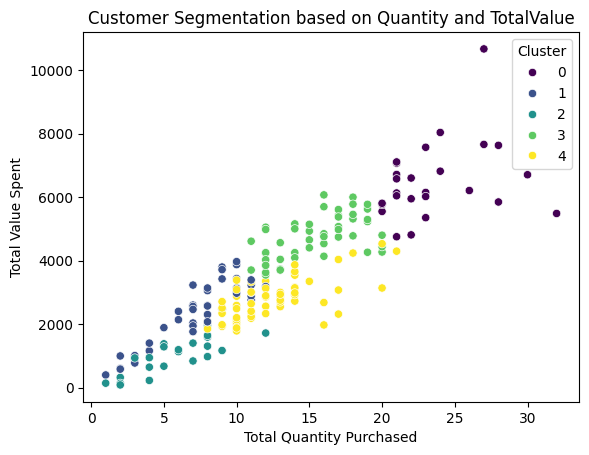

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the clusters
sns.scatterplot(x=customer_features['Quantity'], y=customer_features['TotalValue'], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation based on Quantity and TotalValue')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Value Spent')
plt.show()